In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("emlak.csv",index_col=0)

In [4]:
df.head()

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price
0,95.0,2 + 1,baltalimanında 2+1 eşyalı daire,Kat Kaloriferi,25 Yaşında,1. Kat,"Sarıyer,Baltalimanı Mahallesi",5 Temmuz 2020,"4,250 TL"
1,110.0,2 + 1,sahibinden full eşyalı daire,Kat Kaloriferi,20 Yaşında,boş,"Sarıyer,Ayazağa Mahallesi",20 Haziran 2020,"2,700 TL"
2,0.0,4 + 1,tarabya sanatcılar sitesinde ferah teraslı 4+...,Kat Kaloriferi,20 Yaşında,Çatı Katı,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,"5,500 TL"
3,80.0,1 + 1,sariyer merkezde caddede ofise kuaföre vs.uyg...,Klima,20 Yaşında,2. Kat,"Sarıyer,Merkez Mahallesi",7 Temmuz 2020,"2,250 TL"
4,80.0,1 + 1,sarıyer ayazağa meydan 1+1 eşyalı kiralık dai...,Klima,14 Yaşında,6. Kat,"Sarıyer,Ayazağa Mahallesi",11 Temmuz 2020,"1,600 TL"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1126 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   object 
 5   celly_floortype       1127 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   object 
dtypes: float64(1), object(8)
memory usage: 88.0+ KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.price = df.price.replace('TL','',regex=True)

In [8]:
df.celly_buildingAge.unique()

array(['25 Yaşında', '20 Yaşında', '14 Yaşında', '10 Yaşında',
       '2 Yaşında', '3 Yaşında', '4 Yaşında', '5 Yaşında', '13 Yaşında',
       '6 Yaşında', '19 Yaşında', '30 Yaşında', '16 Yaşında', '8 Yaşında',
       '45 Yaşında', '7 Yaşında', '50 Yaşında', '15 Yaşında',
       '11 Yaşında', '40 Yaşında', 'Sıfır Bina', '12 Yaşında',
       '27 Yaşında', '1 Yaşında', '21 Yaşında', '23 Yaşında',
       '24 Yaşında', '28 Yaşında', '35 Yaşında', '22 Yaşında',
       '26 Yaşında', '18 Yaşında', '29 Yaşında', '17 Yaşında',
       '38 Yaşında', '9 Yaşında', '42 Yaşında', '36 Yaşında',
       '360 Yaşında', '31 Yaşında', '44 Yaşında'], dtype=object)

In [9]:
df_age=df.celly_buildingAge.to_list()

In [10]:
blank=[]
for age in df_age:
    if(age=="Sıfır Bina"):
        blank.append(0)
    else:
        blank.append(int(age[:-8]))
df["celly_buildingAge"]=blank        

In [11]:
df["celly_buildingAge"].value_counts()

25     156
20     117
3       76
4       71
5       71
10      65
8       55
30      54
15      50
0       47
1       42
6       39
2       38
7       23
26      20
9       19
35      18
11      18
12      15
18      14
16      13
24      12
21      11
29      11
28      11
40      10
23      10
14       9
19       6
13       6
22       5
17       3
27       3
50       2
45       1
31       1
36       1
44       1
42       1
38       1
360      1
Name: celly_buildingAge, dtype: int64

In [13]:
df["deprem_sonrası"]=0 # geçici
df.loc[df["celly_buildingAge"]<21,"deprem_sonrası"]=1

In [14]:
df.celly_buildingAge.value_counts()

25     156
20     117
3       76
4       71
5       71
10      65
8       55
30      54
15      50
0       47
1       42
6       39
2       38
7       23
26      20
9       19
35      18
11      18
12      15
18      14
16      13
24      12
21      11
29      11
28      11
40      10
23      10
14       9
19       6
13       6
22       5
17       3
27       3
50       2
45       1
31       1
36       1
44       1
42       1
38       1
360      1
Name: celly_buildingAge, dtype: int64

In [15]:
df.price=df.price.str.replace(r',','').astype("int64")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1126 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1127 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [17]:
df.head()

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası
0,95.0,2 + 1,baltalimanında 2+1 eşyalı daire,Kat Kaloriferi,25,1. Kat,"Sarıyer,Baltalimanı Mahallesi",5 Temmuz 2020,4250,0
1,110.0,2 + 1,sahibinden full eşyalı daire,Kat Kaloriferi,20,boş,"Sarıyer,Ayazağa Mahallesi",20 Haziran 2020,2700,1
2,0.0,4 + 1,tarabya sanatcılar sitesinde ferah teraslı 4+...,Kat Kaloriferi,20,Çatı Katı,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,5500,1
3,80.0,1 + 1,sariyer merkezde caddede ofise kuaföre vs.uyg...,Klima,20,2. Kat,"Sarıyer,Merkez Mahallesi",7 Temmuz 2020,2250,1
4,80.0,1 + 1,sarıyer ayazağa meydan 1+1 eşyalı kiralık dai...,Klima,14,6. Kat,"Sarıyer,Ayazağa Mahallesi",11 Temmuz 2020,1600,1


In [18]:
df.celly_houseRoomCount.value_counts()

3 + 1     328
1 + 1     257
2 + 1     237
4 + 1     149
5 + 1      74
Stüdyo     37
5 + 2      15
4 + 2       9
6 + 1       6
7 + 1       4
3 + 2       3
7 + 2       3
5 + 3       1
6 + 2       1
3 + 0       1
4 + 4       1
31 + 1      1
Name: celly_houseRoomCount, dtype: int64

In [19]:
df[df.celly_houseRoomCount=="Stüdyo"]

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası
12,54.0,Stüdyo,skyland istanbul eşyalı 1+0 kiralık daire,Klima,2,2. Kat,"Sarıyer,Ayazağa Mahallesi",11 Temmuz 2020,3250,1
22,60.0,Stüdyo,sarıyer büyükdere mahallesinde (bayana),Kombi,25,Bahçe Katı,"Sarıyer,Büyükdere Mahallesi",13 Temmuz 2020,500,0
183,60.0,Stüdyo,tarabyaüstü elit bölge ulaşım yakın 1+0 bayan...,Kombi,20,Giriş Katı,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,1200,1
522,40.0,Stüdyo,kireçburnu sahile 200 metre mesafede internet...,Kombi,25,2. Kat,"Sarıyer,Kireçburnu Mahallesi",12 Temmuz 2020,1600,0
610,50.0,Stüdyo,sarıyer tam merkezde geniş 1+0 ..45 m'2..beka...,Kombi,20,3. Kat,"Sarıyer,Merkez Mahallesi",23 Haziran 2020,1250,1
665,50.0,Stüdyo,yeniköy de eşyalı tek oda,Kombi,25,boş,"Sarıyer,Yeniköy Mahallesi",4 Temmuz 2020,1400,0
684,45.0,Stüdyo,sarıyer zekeriyaköy panaroma life eşyalı stüd...,Merkezi,3,2. Kat,"Sarıyer,Zekeriyaköy Mahallesi",10 Temmuz 2020,2500,1
691,64.0,Stüdyo,maslak 1453 kiralık daire 1+0 64m2,Merkezi,1,8. Kat,"Sarıyer,Maslak Mahallesi",10 Temmuz 2020,3000,1
696,50.0,Stüdyo,vadikoru'da kiralık 1+0 stüdyo daire vadi ist...,Merkezi,0,4. Kat,"Sarıyer,Ayazağa Mahallesi",4 Temmuz 2020,2500,1
747,64.0,Stüdyo,maslak 1453 kiralık daire 1+0,Merkezi,1,8. Kat,"Sarıyer,Maslak Mahallesi",10 Temmuz 2020,2800,1


In [20]:
df.celly_floortype=df.celly_floortype.str.strip(" ")

In [21]:
df.celly_floortype.unique()

array(['1. Kat', 'boş', 'Çatı Katı', '2. Kat', '6. Kat', '20. Kat',
       'Bahçe Katı', '13. Kat', '8. Kat', '21 ve üzeri', '4. Kat',
       '10. Kat', '14. Kat', '18. Kat', 'En Üst Kat', '17. Kat', '3. Kat',
       'Ara Kat', 'Yüksek Giriş', 'Kot 1', '5. Kat', 'Giriş Katı',
       'Teras Katı', '12. Kat', '7. Kat', 'Yarı Bodrum', 'Villa Katı',
       'Kot 2', 'Zemin', '16. Kat', 'Kot 3', '15. Kat', '9. Kat',
       '11. Kat', '19. Kat', 'Bodrum'], dtype=object)

In [22]:
katlar=df.celly_floortype.to_list()
yeni=[]
for kat in katlar:
    if(kat=="Kot 3"):
        yeni.append("Kot")
    elif(kat=="Kot 2"):
        yeni.append("Kot")
    elif(kat=="Kot 1"):
        yeni.append("Kot")
    else:
        yeni.append(kat)

In [23]:
df["celly_floortype"]=yeni

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1126 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1127 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [25]:
df.m2.unique() # missing value var.

array([ 95., 110.,   0.,  80., 170., 198.,  85., 100.,  55.,  54.,  94.,
       188.,  37.,  60.,  45., 450., 120., 183., 330., 114.,  40.,  84.,
        90., 140., 160.,  70., 104.,  35., 168.,  50., 175., 105., 190.,
       125., 130.,  65., 118., 115., 145.,  61., 360., 300., 150., 180.,
        10., 166.,  14., 194.,   5., 315.,  75., 500., 185., 135.,  30.,
       165.,  97., 350.,  16.,  74., 460., 480., 136., 147., 400., 111.,
        46., 196., 157., 144.,  56., 109., 195.,  96., 600.,  78., 176.,
        33.,  44.,  88., 320., 370., 388., 316., 560.,  68., 310., 340.,
        63.,  64.,   9., 139., 780., 335., 550.,  19.,  76.,   4.,  77.,
         6., 380.,  89., 126.,  18.,  83.,  47.,  67., 137.,  87.,  69.,
       117.,  73., 128., 177.,  86., 146., 155., 187.,  98.,  57.,  51.,
        79., 167.,   8., 325.,   7., 319.,  nan,  81., 184.,  58.])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1126 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1127 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


# Null Verilerle Başa Çıkmak

In [27]:
df=df.replace("boş",np.nan)

In [28]:
df.m2=df.m2.replace(0,np.nan)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1067 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1007 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [30]:
df.isnull().sum()

m2                       60
celly_houseRoomCount      0
description               0
isitma                    0
celly_buildingAge         0
celly_floortype         120
location                  0
days                      0
price                     0
deprem_sonrası            0
dtype: int64

In [31]:
df[df.m2.isnull()]

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası
2,NaN,4 + 1,tarabya sanatcılar sitesinde ferah teraslı 4+...,Kat Kaloriferi,20,Çatı Katı,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,5500,1
43,NaN,3 + 1,panorama'dan istinye park 1.faz'da mobilyalı ...,Kombi,11,3. Kat,"Sarıyer,İstinye Mahallesi",13 Temmuz 2020,23500,1
50,NaN,4 + 1,tarabyada kiralık boğaz manzaralı çatı dublex,Kombi,0,NaN,"Sarıyer,Ferahevler Mahallesi",13 Temmuz 2020,48000,1
79,NaN,3 + 1,sarıyer tarabya da ulaşıma yakın 3+1 temiz de...,Kombi,21,5. Kat,"Sarıyer,Tarabya Mahallesi",9 Temmuz 2020,4000,0
83,NaN,3 + 1,sarıyerin en güzel beldelerinde bahçeli 169 m...,Kombi,15,Bahçe Katı,"Sarıyer,Kumköy Mahallesi",9 Temmuz 2020,5500,1
90,NaN,4 + 1,sariyer tarabyada 4+1 220 m2 bakimli temiz mu...,Kombi,16,2. Kat,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,20000,1
93,NaN,4 + 1,tarabya'da bahçeli ve boğaz manzaralı 4+1 kir...,Kombi,30,1. Kat,"Sarıyer,Kireçburnu Mahallesi",7 Temmuz 2020,12000,0
99,NaN,5 + 2,geniş bahçe kullanımlı havuz manzaralı yeni b...,Kombi,3,Bahçe Katı,"Sarıyer,Tarabya Mahallesi",9 Temmuz 2020,10000,1
101,NaN,4 + 1,tarabya sanatcılar sitesin de ferah teraslı 4...,Kombi,28,5. Kat,"Sarıyer,Tarabya Mahallesi",13 Temmuz 2020,5500,0
103,NaN,3 + 1,panorama'dan istinye park'ta full mobilyalı b...,Kombi,12,1. Kat,"Sarıyer,İstinye Mahallesi",13 Temmuz 2020,24000,1


# Boş Değerleri Doldurma

In [33]:
import seaborn as sns

C:\Users\PACKERDBELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


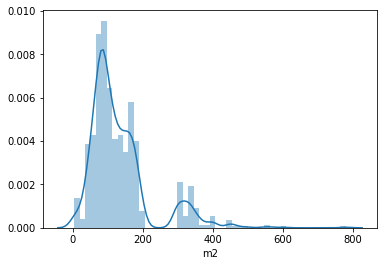

In [36]:
sns.distplot(df["m2"].dropna())

In [37]:
print(df.m2.mean())
print(df.m2.median())

133.19306466729148
110.0


In [38]:
# \d+.kat
# \d+\sm2

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1067 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1007 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [40]:
#null_df=df[df.m2.isnull()]
#null_df.description.str.extract(' (\d+) ([m2])', expand=False)[0]

2       NaN
43      NaN
50      NaN
79      NaN
83      169
90      220
93      NaN
99      NaN
101     NaN
103     NaN
104     NaN
113     NaN
204     NaN
211     NaN
213     NaN
226     NaN
232     NaN
277     NaN
280     NaN
288     NaN
347     NaN
351     NaN
363     NaN
378     NaN
403     NaN
409     NaN
415     NaN
421     NaN
500     NaN
508     NaN
569     NaN
578     NaN
611     NaN
647     NaN
671     NaN
673     NaN
681     NaN
686     NaN
690     NaN
699     NaN
701     NaN
705     NaN
707     NaN
715     NaN
721     NaN
730     NaN
737     NaN
750     NaN
757     NaN
769     NaN
784     NaN
819     200
833     NaN
835     NaN
838     NaN
944     NaN
963     NaN
1062    NaN
1077    NaN
1096    NaN
Name: 0, dtype: object

In [42]:
def findNullValues(df,col,aranacak_kel):
    df[col]=df[col].astype("object")
    null_df=df[df[col].isnull()]
    bilgi=null_df["description"].tolist()
    met=[]
    ind=[]
    for j,i in zip(null_df.index.to_list(),range(len(bilgi))):
        kelimeler=bilgi[i].split()
        for index,kelime in enumerate(kelimeler):
            if(kelime.lower()==aranacak_kel):
                met.append(kelimeler[index-1])
                ind.append(j)
            elif(kelime.lower().endswith(aranacak_kel)):
                met.append(kelime)
                ind.append(j)
    m=pd.Series(met,ind)
    df[col].fillna(m,inplace=True)
    return df 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1067 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1007 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [44]:
df=findNullValues(df,"celly_floortype","katı")
df=findNullValues(df,"m2","m2")
df=findNullValues(df,"celly_floortype","kat")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   m2                    1072 non-null   object
 1   celly_houseRoomCount  1127 non-null   object
 2   description           1127 non-null   object
 3   isitma                1127 non-null   object
 4   celly_buildingAge     1127 non-null   int64 
 5   celly_floortype       1026 non-null   object
 6   location              1127 non-null   object
 7   days                  1127 non-null   object
 8   price                 1127 non-null   int64 
 9   deprem_sonrası        1127 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 96.9+ KB


In [45]:
import re

In [49]:
#df["celly_floortype"]=df["celly_floortype"].astype("object")
#null_df=df[df["celly_floortype"].isnull()]
#bilgi=null_df["description"]
#met=[]
#ind=[]
#for j in null_df.index.to_list():
#    bul=re.findall(r'\w+\skatı',bilgi[j])
#    if(len(bul)>0):

#        met.append(bul[0][:-3])
#        ind.append(j)
#m=pd.Series(met,ind)
#df["celly_floortype"].fillna(m,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   m2                    1072 non-null   object
 1   celly_houseRoomCount  1127 non-null   object
 2   description           1127 non-null   object
 3   isitma                1127 non-null   object
 4   celly_buildingAge     1127 non-null   int64 
 5   celly_floortype       1026 non-null   object
 6   location              1127 non-null   object
 7   days                  1127 non-null   object
 8   price                 1127 non-null   int64 
 9   deprem_sonrası        1127 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 96.9+ KB


C:\Users\PACKERDBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


In [50]:
df.celly_floortype.value_counts()

2. Kat          158
3. Kat          120
21 ve üzeri      94
Bahçe Katı       93
4. Kat           71
1. Kat           69
Çatı Katı        49
Giriş Katı       45
5. Kat           38
Kot              23
Ara Kat          23
Yüksek Giriş     22
10. Kat          20
6. Kat           19
9. Kat           19
11. Kat          17
8. Kat           17
20. Kat          13
7. Kat           11
Villa Katı       10
12. Kat          10
14. Kat           9
15. Kat           9
18. Kat           9
bahçe             8
En Üst Kat        8
17. Kat           6
19. Kat           5
13. Kat           5
ara               5
Zemin             4
Teras Katı        4
16. Kat           4
arakat            2
Yarı Bodrum       2
yüksek            1
bahçekatı         1
teras             1
Bodrum            1
üst               1
Name: celly_floortype, dtype: int64

In [51]:
df.m2.unique()

array([95.0, 110.0, nan, 80.0, 170.0, 198.0, 85.0, 100.0, 55.0, 54.0,
       94.0, 188.0, 37.0, 60.0, 45.0, 450.0, 120.0, 183.0, 330.0, 114.0,
       40.0, 84.0, 90.0, 140.0, 160.0, 70.0, 104.0, 35.0, 168.0, 50.0,
       175.0, 105.0, 190.0, 125.0, 130.0, 65.0, '190m2', 118.0, 115.0,
       '220', 145.0, 61.0, 360.0, 300.0, 150.0, 180.0, 10.0, 166.0, 14.0,
       194.0, 5.0, 315.0, 75.0, 500.0, 185.0, 135.0, 30.0, 165.0, 97.0,
       350.0, 16.0, 74.0, 460.0, 480.0, 136.0, 147.0, 400.0, 111.0, 46.0,
       196.0, 157.0, 144.0, 56.0, 109.0, 195.0, 96.0, 600.0, 78.0, 176.0,
       33.0, 44.0, 88.0, 320.0, 370.0, 388.0, 316.0, 560.0, 68.0, 310.0,
       340.0, 63.0, 64.0, '200m2', 9.0, 139.0, 780.0, 335.0, 550.0, 19.0,
       76.0, 4.0, 77.0, 6.0, '200', 380.0, 89.0, 126.0, 18.0, 83.0, 47.0,
       67.0, 137.0, 87.0, 69.0, 117.0, 73.0, 128.0, 177.0, 86.0, 146.0,
       155.0, 187.0, 98.0, 57.0, 51.0, 79.0, 167.0, 8.0, 325.0, 7.0,
       319.0, 81.0, 184.0, 58.0], dtype=object)

In [64]:
df.loc[df["m2"]=="190m2","m2"]=190
df.loc[df["m2"]=="200m2","m2"]=200

In [65]:
df.m2=df.m2.astype("float64")

In [66]:
df.isnull().sum()

m2                       55
celly_houseRoomCount      0
description               0
isitma                    0
celly_buildingAge         0
celly_floortype         101
location                  0
days                      0
price                     0
deprem_sonrası            0
dtype: int64

In [67]:
room_cnt = df['celly_houseRoomCount'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

room = []
for i in room_cnt:
    if(i=="Stüdyo"):
        room.append("1 + 0")
    else:
        room.append(i)

df['celly_houseRoomCount'] = room
df['celly_houseRoomCount'].unique()

array(['2 + 1', '4 + 1', '1 + 1', '3 + 1', '1 + 0', '5 + 2', '5 + 1',
       '6 + 1', '4 + 2', '3 + 2', '3 + 0', '4 + 4', '7 + 2', '7 + 1',
       '6 + 2', '31 + 1', '5 + 3'], dtype=object)

# Null Doldurma

In [68]:
# En yakın komşuyla doldurma
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
df["m2"] = imputer.fit_transform(df["m2"].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m2                    1127 non-null   float64
 1   celly_houseRoomCount  1127 non-null   object 
 2   description           1127 non-null   object 
 3   isitma                1127 non-null   object 
 4   celly_buildingAge     1127 non-null   int64  
 5   celly_floortype       1026 non-null   object 
 6   location              1127 non-null   object 
 7   days                  1127 non-null   object 
 8   price                 1127 non-null   int64  
 9   deprem_sonrası        1127 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 96.9+ KB


In [69]:
# En çok tekrar edenle (most frequently)
df["celly_floortype"]=df["celly_floortype"].fillna(df["celly_floortype"].value_counts(ascending=False).index[0])

# Şimdi days kolonu üzerinde işlemler yapalım

In [70]:
months = {"Ocak":"January", "Şubat":"February", "Mart":"March", "Nisan":"April",
          "Mayıs":"May", "Haziran":"June","Temmuz":"July","Ağustos":"August",
          "Eylül":"September", "Ekim":"October", "Kasım":"November", "Aralık":"December"}

In [71]:
df.days = df.days.replace(months, regex=True)

In [72]:
df.days.value_counts()

13 July 2020    360
12 July 2020    111
8 July 2020      80
11 July 2020     64
10 July 2020     59
7 July 2020      42
6 July 2020      37
9 July 2020      33
30 June 2020     32
3 July 2020      29
1 July 2020      26
4 July 2020      23
28 June 2020     20
29 June 2020     18
18 June 2020     16
23 June 2020     16
2 July 2020      15
26 June 2020     14
5 July 2020      13
17 June 2020     12
22 June 2020     10
25 June 2020     10
21 June 2020      9
15 June 2020      9
27 June 2020      9
14 June 2020      8
20 June 2020      8
16 June 2020      7
19 June 2020      5
23 May 2020       4
1 June 2020       3
13 June 2020      3
4 June 2020       3
3 June 2020       2
2 June 2020       2
24 June 2020      2
24 May 2020       2
8 June 2020       2
16 May 2020       2
27 May 2020       2
31 May 2020       1
15 May 2020       1
29 May 2020       1
5 June 2020       1
30 May 2020       1
Name: days, dtype: int64

In [73]:
df.days = pd.to_datetime(df.days)

In [74]:
# Kazıdığım gün.Bir ev ilanı ne kadar çok beklerse o kadar fiyat düşebilir?
df['ad_duration'] = pd.to_datetime('2020-07-13') - pd.to_datetime(df['days'])

In [75]:
df.head()

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası,ad_duration
0,95.000000,2 + 1,baltalimanında 2+1 eşyalı daire,Kat Kaloriferi,25,1. Kat,"Sarıyer,Baltalimanı Mahallesi",2020-07-05,4250,0,8 days
1,110.000000,2 + 1,sahibinden full eşyalı daire,Kat Kaloriferi,20,2. Kat,"Sarıyer,Ayazağa Mahallesi",2020-06-20,2700,1,23 days
2,133.513993,4 + 1,tarabya sanatcılar sitesinde ferah teraslı 4+...,Kat Kaloriferi,20,Çatı Katı,"Sarıyer,Tarabya Mahallesi",2020-07-13,5500,1,0 days
3,80.000000,1 + 1,sariyer merkezde caddede ofise kuaföre vs.uyg...,Klima,20,2. Kat,"Sarıyer,Merkez Mahallesi",2020-07-07,2250,1,6 days
4,80.000000,1 + 1,sarıyer ayazağa meydan 1+1 eşyalı kiralık dai...,Klima,14,6. Kat,"Sarıyer,Ayazağa Mahallesi",2020-07-11,1600,1,2 days


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   m2                    1127 non-null   float64        
 1   celly_houseRoomCount  1127 non-null   object         
 2   description           1127 non-null   object         
 3   isitma                1127 non-null   object         
 4   celly_buildingAge     1127 non-null   int64          
 5   celly_floortype       1127 non-null   object         
 6   location              1127 non-null   object         
 7   days                  1127 non-null   datetime64[ns] 
 8   price                 1127 non-null   int64          
 9   deprem_sonrası        1127 non-null   int64          
 10  ad_duration           1127 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5), timedelta64[ns](1)
memory usage: 105.7+ KB


### days sütunu ile işimiz bittii

# EDA

In [77]:
df.celly_houseRoomCount.unique()

array(['2 + 1', '4 + 1', '1 + 1', '3 + 1', '1 + 0', '5 + 2', '5 + 1',
       '6 + 1', '4 + 2', '3 + 2', '3 + 0', '4 + 4', '7 + 2', '7 + 1',
       '6 + 2', '31 + 1', '5 + 3'], dtype=object)

In [78]:
outlier_roomCount=df[ (df.celly_houseRoomCount=="31 + 1") | (df.celly_houseRoomCount=="7 + 1") |
   (df.celly_houseRoomCount=="7 + 2") | (df.celly_floortype=="Villa Katı")].index.to_list()
df.drop(outlier_roomCount,inplace=True)

In [79]:
df.shape

(1109, 11)

# Price Outlier Detection

In [80]:
print(df.price.mean())
print(df.price.median()) # Outlier Alarm !

46348.44815148783
5500.0


In [81]:
print(df.price.max())
print(df.price.min())

18000000
500


In [82]:
df.price.sort_values(ascending=False).head(20)

779     18000000
393      8750000
979      3250000
1018     3100000
883      2200000
932      1750000
1004     1450000
998      1300000
842      1250000
949      1130000
712        78000
786        54800
785        54800
165        50000
50         48000
793        47900
503        44000
771        42000
653        42000
794        41100
Name: price, dtype: int64

In [83]:
df.drop([779,393,979,1018,883,932,1004,998,842,949,712], inplace=True) # fiyatı yukarı çekenler

In [84]:
df.price.sort_values(ascending=False).tail(20)

179    1200
183    1200
567    1200
799    1200
362    1200
635    1100
192    1100
251    1100
797    1000
796    1000
737    1000
238    1000
800    1000
801    1000
184    1000
626     900
805     900
804     750
803     750
22      500
Name: price, dtype: int64

In [85]:
df.drop([626,805,804,803,22], inplace=True) 

In [86]:
df.price.sort_values().head(20)

796    1000
184    1000
801    1000
737    1000
800    1000
797    1000
238    1000
635    1100
192    1100
251    1100
799    1200
183    1200
362    1200
567    1200
179    1200
798    1250
664    1250
610    1250
40     1300
237    1300
Name: price, dtype: int64

In [87]:
print(df.price.mean())
print(df.price.median()) # hala outlier veri var. 

8361.051235132662
5500.0


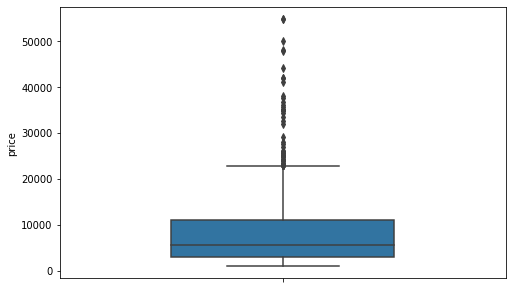

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)

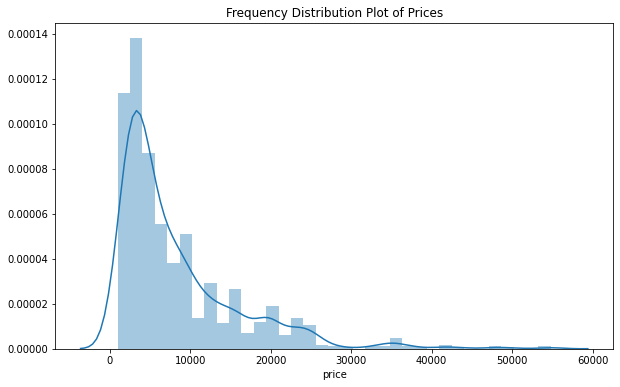

In [89]:
x = df.price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')
plt.savefig("target.jpeg",dpi=300,bbox_inches="tight")

Sola yatık bir grafik bu da demektir ki düşük fiyatlarda outlierlar var.Pozitif skewness'a çözümlerden biri log işlemi uygulamaktır.


# Duration

### Kullanabileceğimiz formata sokalım.

In [90]:
df['ad_duration'].value_counts()

0 days     350
1 days     108
5 days      79
2 days      61
3 days      59
6 days      39
7 days      36
4 days      33
13 days     30
10 days     29
12 days     26
9 days      22
15 days     18
14 days     18
25 days     16
20 days     15
17 days     14
8 days      13
11 days     13
26 days     12
18 days     10
22 days      9
21 days      9
29 days      8
28 days      8
16 days      8
23 days      7
27 days      7
24 days      5
51 days      4
30 days      3
42 days      3
39 days      3
41 days      2
19 days      2
50 days      2
40 days      2
58 days      2
35 days      2
59 days      1
43 days      1
47 days      1
44 days      1
45 days      1
38 days      1
Name: ad_duration, dtype: int64

In [91]:
df.ad_duration[0]

Timedelta('8 days 00:00:00')

In [92]:
df.ad_duration = df.ad_duration.astype('str')

In [93]:
df.ad_duration = df.ad_duration.str.split(' ', expand=True)

In [94]:
df.ad_duration=df.ad_duration.astype("int")

İlan kaç gündür yayında?

Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration')

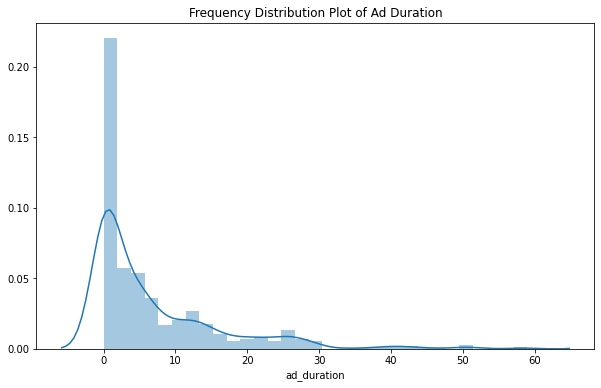

In [95]:
plt.figure(figsize=(10,6))
g=sns.distplot(df.ad_duration)
g.set_title("Frequency Distribution Plot of Ad Duration")

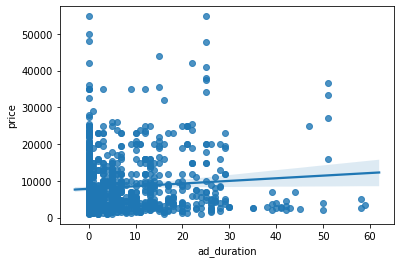

In [96]:
sns.regplot(x="ad_duration",y="price",data=df)

In [97]:
df.corr()["price"]

m2                   0.494842
celly_buildingAge   -0.080674
price                1.000000
deprem_sonrası       0.113689
ad_duration          0.088964
Name: price, dtype: float64

İlanların çoğu yeni ilanlar.

In [98]:
print(df.ad_duration.mean())
print(df.ad_duration.median())
print(df.ad_duration.std())

6.906678865507777
3.0
9.651267318151103


In [99]:
day=df[df.ad_duration<20]

Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration')

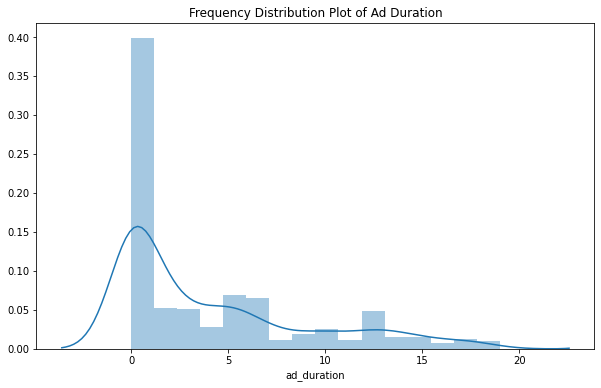

In [100]:
plt.figure(figsize=(10,6))
g=sns.distplot(day.ad_duration)
g.set_title("Frequency Distribution Plot of Ad Duration")

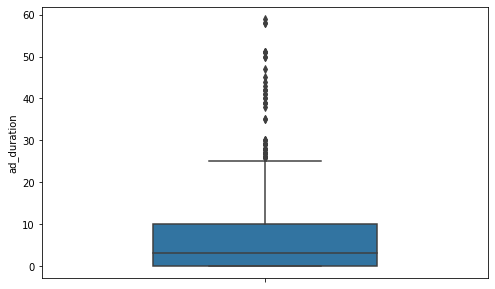

In [101]:
plt.figure(figsize=(8,5))
sns.boxplot(y='ad_duration', data=df, width=0.5)

# Age
Evin yaşı da fiyatı etkiler.Bakalım.

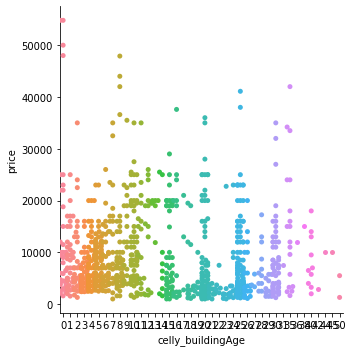

In [102]:
sns.catplot(x="celly_buildingAge", y="price", kind="swarm",data=df);

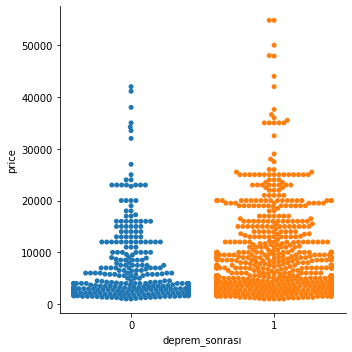

In [103]:
sns.catplot(x="deprem_sonrası", y="price", kind="swarm",data=df); # 0 genç bina 1 yaşlı bina
plt.savefig("deprem.jpeg",dpi=300,bbox_inches="tight")

Deprem sonrası ev kiralarında yüksek fiyatlar görüyoruz. Deprem öncesi bazı ev kiraları da az değil.

Text(0.5, 1.0, 'Frequency Distribution Plot of m2')

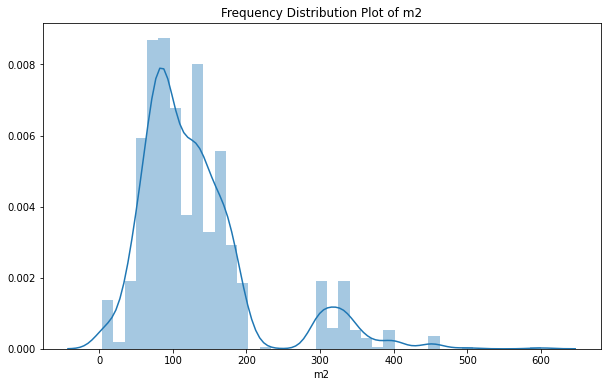

In [104]:
x = df.m2
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of m2')

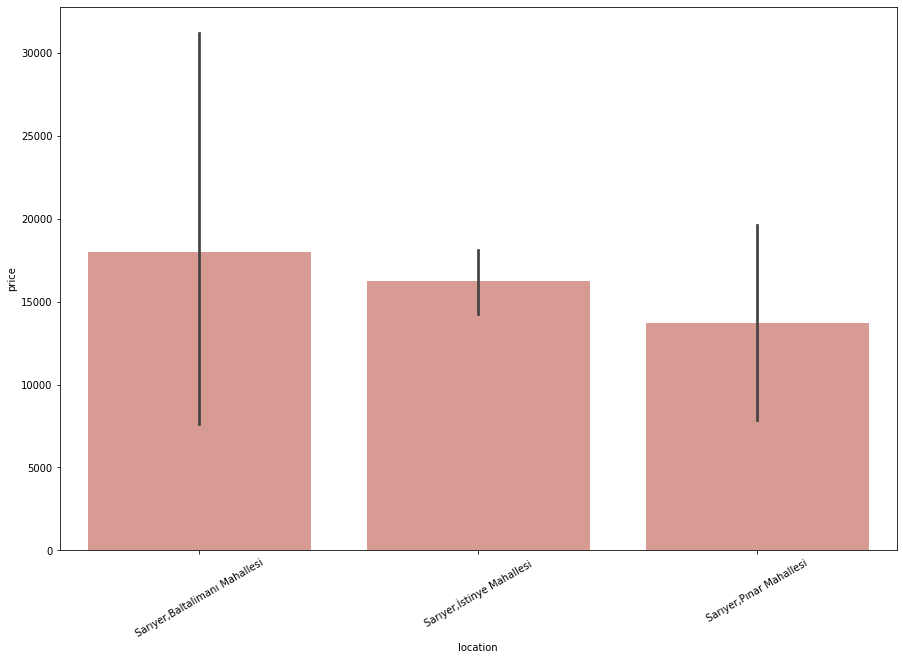

In [105]:
best_3_loc=df.groupby("location")["price"].mean().sort_values(ascending=False).head(3)
best_3_loc=best_3_loc.index.to_list()

plt.figure(figsize=(15,10))
sns.barplot(x=df["location"][df["location"].isin(best_3_loc)],y=df["price"],color="salmon",saturation=.5)
plt.xticks(rotation=30)
plt.savefig("loc3.jpeg",dpi=300,bbox_inches="tight")

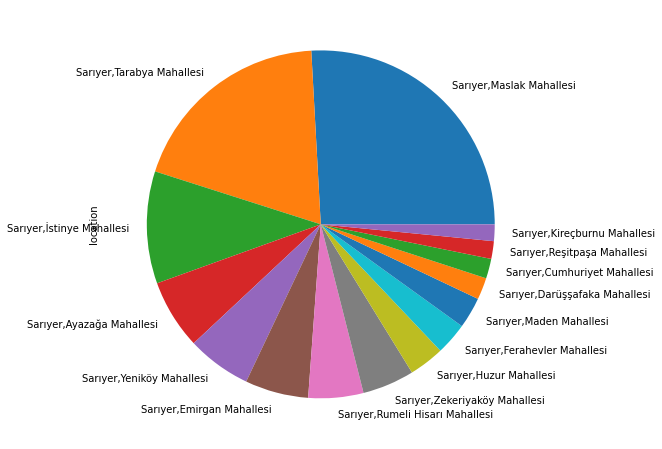

In [102]:
loc=df.location.value_counts().head(15)
loc.plot(kind='pie' ,subplots=True, figsize=(8, 8))
plt.savefig("loc3.jpeg",dpi=300,bbox_inches="tight")

In [784]:
df.head()

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası,ad_duration
0,95.000,2 + 1,baltalimanında 2+1 eşyalı daire,Kat Kaloriferi,25,1. Kat,"Sarıyer,Baltalimanı Mahallesi",2020-07-05,4250,0,8
1,110.000,2 + 1,sahibinden full eşyalı daire,Kat Kaloriferi,20,2. Kat,"Sarıyer,Ayazağa Mahallesi",2020-06-20,2700,1,23
2,121.088,4 + 1,tarabya sanatcılar sitesinde ferah teraslı 4+...,Kat Kaloriferi,20,Çatı Katı,"Sarıyer,Tarabya Mahallesi",2020-07-13,5500,1,0
3,80.000,1 + 1,sariyer merkezde caddede ofise kuaföre vs.uyg...,Klima,20,2. Kat,"Sarıyer,Merkez Mahallesi",2020-07-07,2250,1,6
4,80.000,1 + 1,sarıyer ayazağa meydan 1+1 eşyalı kiralık dai...,Klima,14,6. Kat,"Sarıyer,Ayazağa Mahallesi",2020-07-11,1600,1,2


<Figure size 1080x720 with 0 Axes>

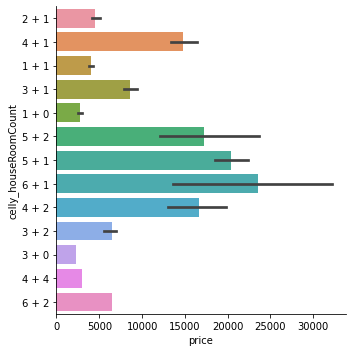

In [151]:
plt.figure(figsize=(15,10))
g = sns.catplot(y="celly_houseRoomCount", x="price", kind="bar",  data=df)
plt.savefig("oda.jpeg",dpi=300,bbox_inches="tight")

In [786]:
df[df.celly_houseRoomCount=="6 + 1"]

,m2,celly_houseRoomCount,description,isitma,celly_buildingAge,celly_floortype,location,days,price,deprem_sonrası,ad_duration
110,300.0,6 + 1,tarabya sanatçılar sitesinde kiralık 4 katlı ...,Kombi,24,En Üst Kat,"Sarıyer,Tarabya Mahallesi",2020-07-05,10000,0,8
312,400.0,6 + 1,istinyepark evleri düz ara kat daire 400m2 6+...,Kombi,7,3. Kat,"Sarıyer,İstinye Mahallesi",2020-07-13,32500,1,0
332,450.0,6 + 1,istinyepark residence 450m2 bahce dubleks kir...,Kombi,7,Bahçe Katı,"Sarıyer,İstinye Mahallesi",2020-07-13,35000,1,0
540,330.0,6 + 1,kilyosta merkezi lokasyonda bakımlı tripleks ...,Kombi,20,Ara Kat,"Sarıyer,Kumköy Mahallesi",2020-06-20,6000,1,23
579,388.0,6 + 1,ıstınyepark resıdence kıralık bahce dubleksı ...,Kombi,11,Bahçe Katı,"Sarıyer,Pınar Mahallesi",2020-07-13,35000,1,0
893,330.0,6 + 1,tarabya deniz manzaralı cephesi yeşil full ta...,Merkezi (Pay Ölçer),25,4. Kat,"Sarıyer,Tarabya Mahallesi",2020-07-10,23000,0,3


## Biraz Feature Engineering
Description kolonunu yukarda missing value aramada kullanmıştım ama biraz daha etinden sütünden faydalanabilirim :)

In [ ]:
# Bu tarz bir fonksiyonu arayacağım bilgiye göre uyarlayacağım.
def search_inf(info,aranan_bilgi):
    if(info.find(aranan_bilgi)>0):
        return 1
    else:
        return 0

In [ ]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

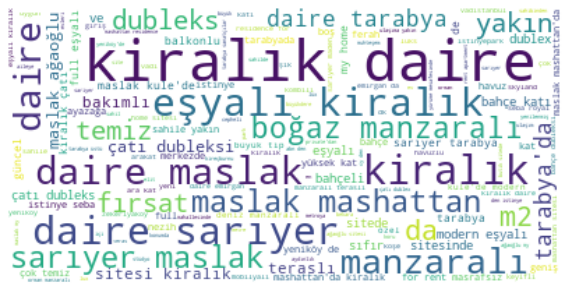

In [127]:
from wordcloud import WordCloud, STOPWORDS
text_list = list(df.description)
text = '-'.join(text_list)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [106]:
df.celly_floortype.unique()

array(['1. Kat', '2. Kat', 'Çatı Katı', '6. Kat', '20. Kat', 'Bahçe Katı',
       '13. Kat', '8. Kat', '21 ve üzeri', '4. Kat', '10. Kat', '14. Kat',
       '18. Kat', 'En Üst Kat', '17. Kat', '3. Kat', 'Ara Kat',
       'Yüksek Giriş', 'Kot', '5. Kat', 'Giriş Katı', 'Teras Katı',
       '12. Kat', '7. Kat', 'bahçe', 'Yarı Bodrum', 'Zemin', 'ara',
       '16. Kat', '15. Kat', 'arakat', 'teras', 'üst', '9. Kat',
       '11. Kat', '19. Kat', 'Bodrum', 'yüksek'], dtype=object)

# Boğaza yakınlık

In [107]:
def search_inf(info):
    if(info.find("boğaz")>=0 or info.find("sahil")>=0 or info.find("Sahil")>=0 or info.find("BOĞAZ")>=0 or info.find("Boğaz")>=0 or info.find("15 Temmuz")>=0 
      or info.find("15 TEMMUZ")>=0 or info.find("15Temmuz")>=0  ):
        return 1
    else:
        return 0
df["boğaza_bakan"]=df.description.map(search_inf)

# Metroya yakınlık

In [108]:
def search_inf(info):
    if(info.find("metro")>=0 or info.find("Metro")>=0 ):
        return 1
    else:
        return 0
df["metroya_yakın"]=df.description.map(search_inf)

# Terası olup olmaması

In [109]:
def search_inf(info):
    if(info.find("teras")>=0 or info.find("Teras")>=0 or
       info.find("dubleks")>=0 or info.find("Dubleks")>=0 or info.find("Tripleks")>=0 or info.find("TRİP")>=0):
        return 1
    else:
        return 0
df["teras"]=df.description.map(search_inf)
df.loc[(df["celly_floortype"]=="Teras Katı"),"teras"] =1
df.loc[(df["celly_floortype"]=="teras "),"teras"] =1
df.loc[(df["celly_floortype"]=="teras k"),"teras"] =1
df.loc[(df["celly_floortype"]=="teras"),"teras"] =1

# Eşyalı Olup Olmaması

In [110]:
def search_inf(info):
    if(info.find("eşya")>=0 or info.find("esya")>=0 or
       info.find("Eşya")>=0 or info.find("Esya")>=0 or
       info.find("mob")>=0 or info.find("Mob")>=0 ):
        return 1
    else:
        return 0
df["eşyalı"]=df.description.map(search_inf)

In [111]:
df["celly_floortype"].unique()

array(['1. Kat', '2. Kat', 'Çatı Katı', '6. Kat', '20. Kat', 'Bahçe Katı',
       '13. Kat', '8. Kat', '21 ve üzeri', '4. Kat', '10. Kat', '14. Kat',
       '18. Kat', 'En Üst Kat', '17. Kat', '3. Kat', 'Ara Kat',
       'Yüksek Giriş', 'Kot', '5. Kat', 'Giriş Katı', 'Teras Katı',
       '12. Kat', '7. Kat', 'bahçe', 'Yarı Bodrum', 'Zemin', 'ara',
       '16. Kat', '15. Kat', 'arakat', 'teras', 'üst', '9. Kat',
       '11. Kat', '19. Kat', 'Bodrum', 'yüksek'], dtype=object)

# Bahçesi Olup Olmaması

In [112]:
def search_inf(info):
    if(info.find("bahçe")>=0 or info.find("bahce")>=0):
        return 1
    else:
        return 0
df["bahçeli"]=df.description.map(search_inf)
df.loc[(df["celly_floortype"]=="bahçe"),"bahçeli"] =1
df.loc[(df["celly_floortype"]=="Bahçe Katı"),"bahçeli"] =1
df.loc[(df["celly_floortype"]=="bahçekatı"),"bahçeli"] =1

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   m2                    1093 non-null   float64       
 1   celly_houseRoomCount  1093 non-null   object        
 2   description           1093 non-null   object        
 3   isitma                1093 non-null   object        
 4   celly_buildingAge     1093 non-null   int64         
 5   celly_floortype       1093 non-null   object        
 6   location              1093 non-null   object        
 7   days                  1093 non-null   datetime64[ns]
 8   price                 1093 non-null   int64         
 9   deprem_sonrası        1093 non-null   int64         
 10  ad_duration           1093 non-null   int32         
 11  boğaza_bakan          1093 non-null   int64         
 12  metroya_yakın         1093 non-null   int64         
 13  teras             

In [114]:
room_cnt = df['celly_houseRoomCount'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

room = []
salon=[]
for i in room_cnt:
    room.append(int(i[0]))
    salon.append(int(i[-1]))

df["bedroom"]=room
df["salon"]=salon

In [115]:
df.celly_floortype.unique()

array(['1. Kat', '2. Kat', 'Çatı Katı', '6. Kat', '20. Kat', 'Bahçe Katı',
       '13. Kat', '8. Kat', '21 ve üzeri', '4. Kat', '10. Kat', '14. Kat',
       '18. Kat', 'En Üst Kat', '17. Kat', '3. Kat', 'Ara Kat',
       'Yüksek Giriş', 'Kot', '5. Kat', 'Giriş Katı', 'Teras Katı',
       '12. Kat', '7. Kat', 'bahçe', 'Yarı Bodrum', 'Zemin', 'ara',
       '16. Kat', '15. Kat', 'arakat', 'teras', 'üst', '9. Kat',
       '11. Kat', '19. Kat', 'Bodrum', 'yüksek'], dtype=object)

In [116]:
floor = df['celly_floortype'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

flr = []
for i in floor:
    if(i=="Yüksek Giriş" or i=="bahçe" or i=="yüksek " or i=="Giriş Katı" or i=="bahçekatı" or i=="Bahçe Katı" or i=="bahçe k" or i=="yüksek" or i=="bahçe " or i=="Zemin"):
        flr.append("1. Kat")
    elif(i=="En Üst Kat" or i=="üst" or i=="teras" or i=="Teras Katı" or i=="üst " or i=="teras k" or i=="teras " or i=="21 ve üzeri"):
        flr.append("Çatı Katı")
    elif(i=="2. Kat" or i=="3. Kat" or i=="4. Kat" or i=="5. Kat" or i=="11. Kat" or i=="7. Kat" or i=="6. Kat" or i=="16. Kat" or
        i=="15. Kat" or i=="20. Kat" or i=="9. Kat" or i=="12. Kat" or i=="13. Kat" or i=="17. Kat" or i=="14. Kat" or i=="10. Kat" or
        i=="18. Kat" or i=="8. Kat" or i=="19. Kat" or i=="ara" or i=="arakat" or i=="ara "):
        flr.append("Ara Kat")
    elif(i=="Yarı Bodrum" or i=="Bodrum" or i=="Kot"):
        flr.append("Bodrum")    
    else:
        flr.append(i)

df['celly_floortype'] = flr
df['celly_floortype'].unique()

array(['1. Kat', 'Ara Kat', 'Çatı Katı', 'Bodrum'], dtype=object)

In [117]:
df.columns

Index(['m2', 'celly_houseRoomCount', 'description', 'isitma',
       'celly_buildingAge', 'celly_floortype', 'location', 'days', 'price',
       'deprem_sonrası', 'ad_duration', 'boğaza_bakan', 'metroya_yakın',
       'teras', 'eşyalı', 'bahçeli', 'bedroom', 'salon'],
      dtype='object')

In [118]:
df.drop(columns=["description","deprem_sonrası","celly_houseRoomCount","days"],inplace=True)

# Kategorik Değişkenleri Nümerik Değerlerle Değiştirmek

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1093 non-null   float64
 1   isitma             1093 non-null   object 
 2   celly_buildingAge  1093 non-null   int64  
 3   celly_floortype    1093 non-null   object 
 4   location           1093 non-null   object 
 5   price              1093 non-null   int64  
 6   ad_duration        1093 non-null   int32  
 7   boğaza_bakan       1093 non-null   int64  
 8   metroya_yakın      1093 non-null   int64  
 9   teras              1093 non-null   int64  
 10  eşyalı             1093 non-null   int64  
 11  bahçeli            1093 non-null   int64  
 12  bedroom            1093 non-null   int64  
 13  salon              1093 non-null   int64  
dtypes: float64(1), int32(1), int64(9), object(3)
memory usage: 163.8+ KB


In [120]:
cat_col = ['celly_buildingAge',"celly_floortype",'location']
cat_col

['celly_buildingAge', 'celly_floortype', 'location']

In [121]:
geçici=pd.concat([pd.get_dummies(df["celly_floortype"]),df["price"]],axis=1) 


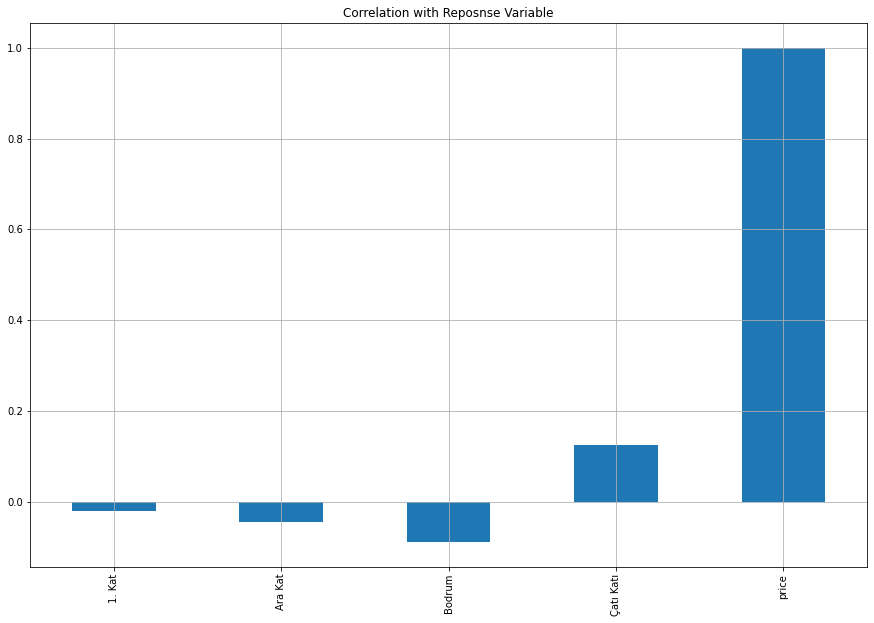

In [122]:
geçici.corrwith(geçici.price).plot.bar(figsize=(15, 10),
                  title = 'Correlation with Reposnse Variable',
                  fontsize = 10, rot = 90,
                  grid = True)

In [78]:
import seaborn as sns

C:\Users\PACKERDBELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


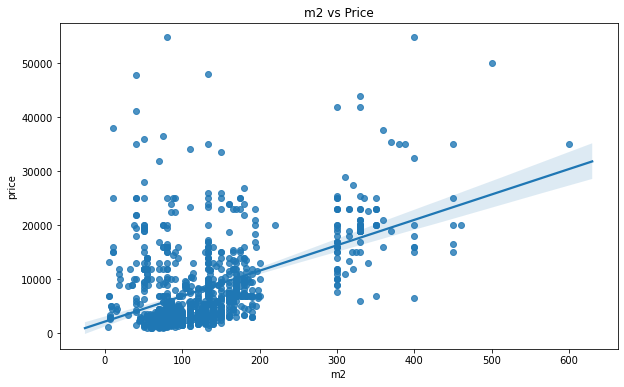

In [321]:
plt.figure(figsize=(10,6))
sns.regplot(x='m2', y='price', data=df).set_title('m2 vs Price')
plt.savefig("m2.jpeg",dpi=300,bbox_inches="tight")

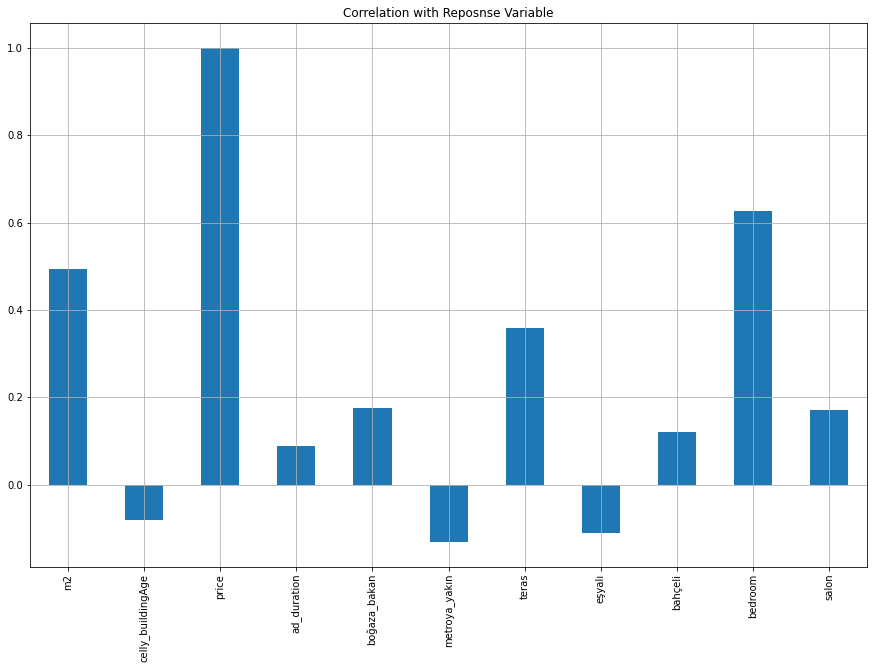

In [123]:
df.corrwith(df.price).plot.bar(figsize=(15, 10),
                  title = 'Correlation with Reposnse Variable',
                  fontsize = 10, rot = 90,
                  grid = True)

In [264]:
df.to_csv("denemee.csv")